# Dataset Collection & EDA

Pada notebook ini, kita akan menyiapkan dataset untuk proyek:
**Sign Language Alphabet Recognition dengan CNN + Hybrid GA–PSO**.

Langkah-langkah:
1. Download dataset **ASL Alphabet** dari Kaggle.
2. Ekstraksi folder dataset dan melihat struktur datanya.
3. Menampilkan contoh gambar dari beberapa kelas.
4. Melakukan Exploratory Data Analysis (EDA) sederhana untuk melihat distribusi kelas.


# Setup Environment

In [6]:
!pip install kaggle matplotlib seaborn
import os

# Download Dataset ASL Alphabet

In [7]:
# Pastikan sudah upload kaggle.json ke /content
if not os.path.exists('/root/.kaggle'):
    os.mkdir('/root/.kaggle')

!cp /content/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d grassknoted/asl-alphabet -p /content
!unzip -q /content/asl-alphabet.zip -d /content/asl_alphabet

Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
 95% 998M/1.03G [00:07<00:01, 39.8MB/s]
100% 1.03G/1.03G [00:07<00:00, 142MB/s]


# Cek Struktur Dataset

In [9]:
import os

train_dir = "/content/asl_alphabet/asl_alphabet_train/asl_alphabet_train" # Corrected path
labels = sorted(os.listdir(train_dir))
print("Jumlah kelas:", len(labels))
print("Contoh label:", labels[:10])

Jumlah kelas: 29
Contoh label: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']


# Tampilkan Contoh Gambar

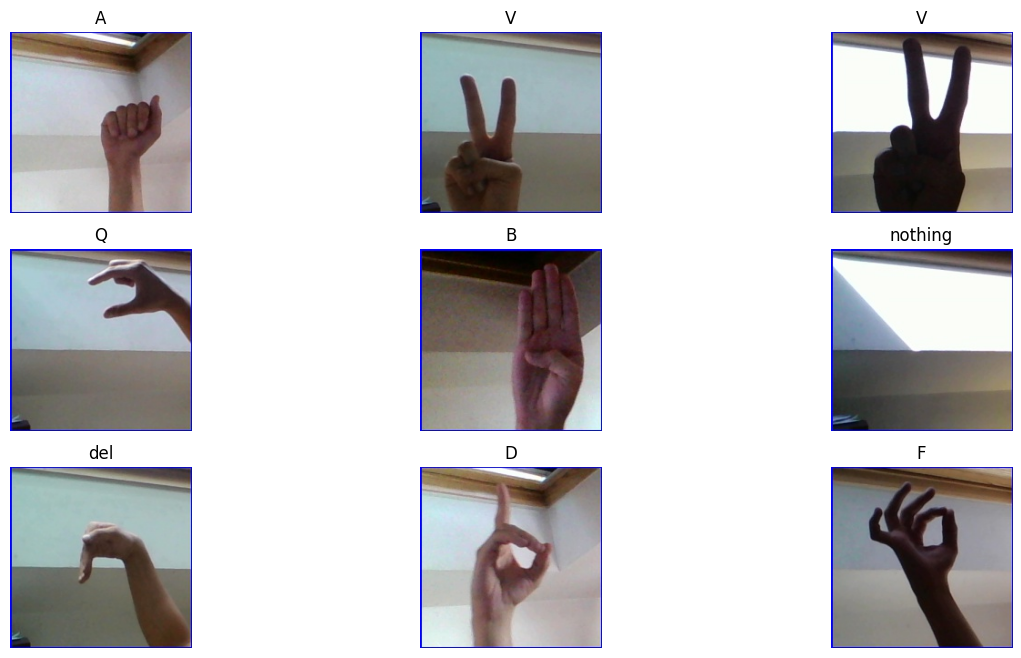

In [10]:
import matplotlib.pyplot as plt
import cv2
import random

plt.figure(figsize=(15,8))
i = 0
shown = 0

# loop terus sampai dapat 9 gambar valid
while shown < 9:
    label = random.choice(labels)
    folder = os.path.join(train_dir, label)
    img_path = os.path.join(folder, random.choice(os.listdir(folder)))

    img = cv2.imread(img_path)
    if img is None:   # skip kalau file tidak bisa dibaca
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,shown+1)
    plt.imshow(img_rgb)
    plt.title(label)
    plt.axis("off")
    shown += 1

plt.show()


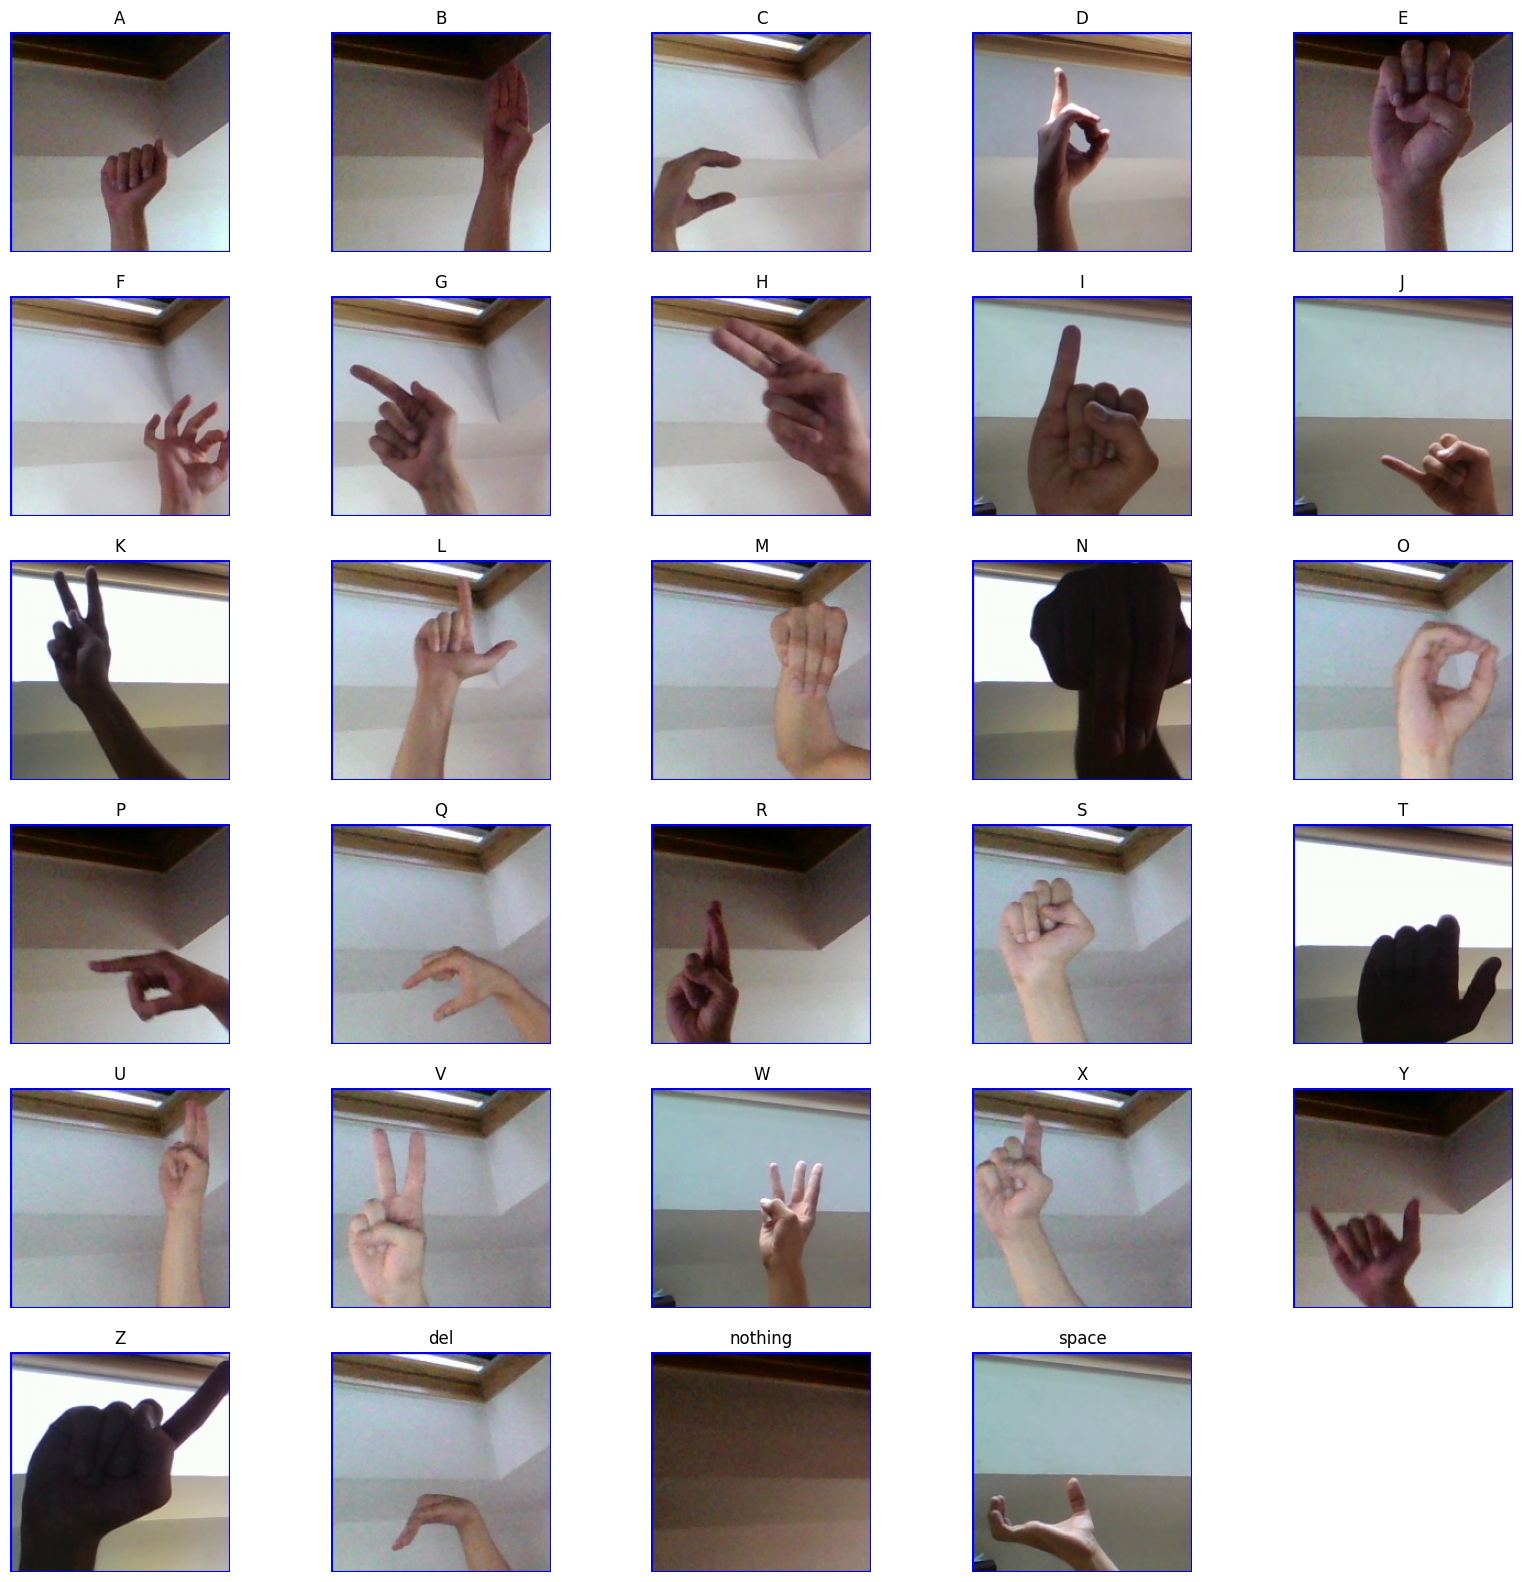

In [11]:
import matplotlib.pyplot as plt
import cv2
import os

plt.figure(figsize=(20, 20))

for idx, label in enumerate(labels):
    folder = os.path.join(train_dir, label)
    files = os.listdir(folder)

    # cari 1 file yang valid
    img = None
    for f in files:
        img_path = os.path.join(folder, f)
        img = cv2.imread(img_path)
        if img is not None:
            break

    if img is None:
        print(f"⚠️ Tidak ada gambar valid di {label}")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(6, 5, idx + 1)  # 6 baris × 5 kolom (untuk 29 kelas)
    plt.imshow(img_rgb)
    plt.title(label)
    plt.axis("off")

#Exploratory Data Analysis (EDA)

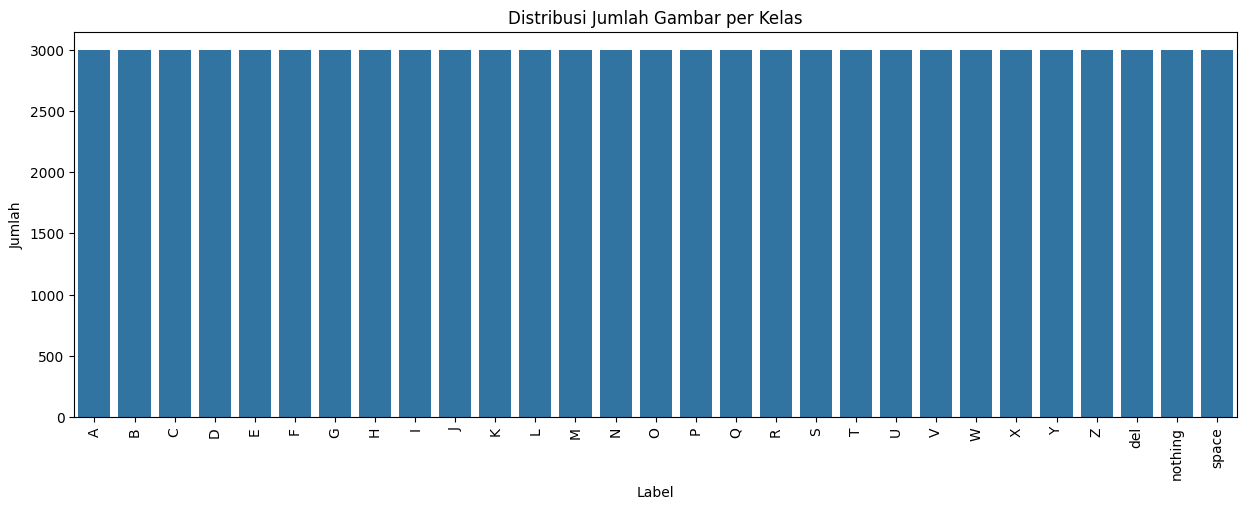

,Label,Jumlah
0,A,3000
1,B,3000
2,C,3000
3,D,3000
4,E,3000


In [12]:
import pandas as pd
import seaborn as sns

data_count = {}
for label in labels:
    folder = os.path.join(train_dir, label)
    data_count[label] = len(os.listdir(folder))

df = pd.DataFrame(list(data_count.items()), columns=["Label","Jumlah"])
plt.figure(figsize=(15,5))
sns.barplot(x="Label", y="Jumlah", data=df, order=df.sort_values("Jumlah", ascending=False)["Label"])
plt.title("Distribusi Jumlah Gambar per Kelas")
plt.xticks(rotation=90)
plt.show()

df.head()


In [13]:
import cv2
import numpy as np

#ukuran gambar (cek konsistensi dimensi)
dims = []
for label in labels[:5]:  # cek 5 kelas pertama aja biar cepat
    folder = os.path.join(train_dir, label)
    img_path = os.path.join(folder, os.listdir(folder)[0])
    img = cv2.imread(img_path)
    if img is not None:
        dims.append(img.shape)

dims = np.array(dims)
print("Contoh dimensi gambar:", dims)


Contoh dimensi gambar: [[200 200   3]
 [200 200   3]
 [200 200   3]
 [200 200   3]
 [200 200   3]]


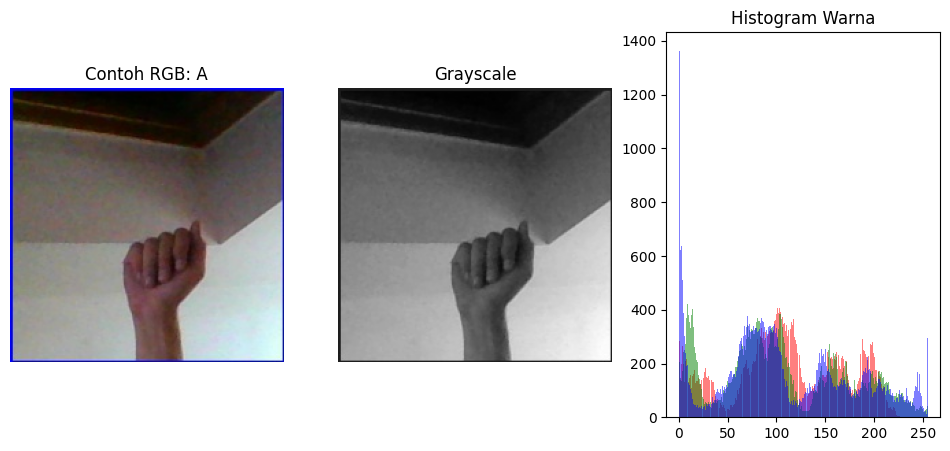

In [14]:
#Visualisasi contoh grayscale & histogram warna
sample_class = "A"
sample_path = os.path.join(train_dir, sample_class, os.listdir(os.path.join(train_dir, sample_class))[0])
img = cv2.imread(sample_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title(f"Contoh RGB: {sample_class}")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1,3,3)
for i, col in enumerate(['r','g','b']):
    plt.hist(img_rgb[:,:,i].ravel(), bins=256, color=col, alpha=0.5)
plt.title("Histogram Warna")
plt.show()


In [15]:
print("Jumlah total gambar:", df["Jumlah"].sum())
print("Jumlah kelas:", len(df))
print("Kelas dengan data terbanyak:", df.loc[df["Jumlah"].idxmax()].to_dict())
print("Kelas dengan data tersedikit:", df.loc[df["Jumlah"].idxmin()].to_dict())

Jumlah total gambar: 87000
Jumlah kelas: 29
Kelas dengan data terbanyak: {'Label': 'A', 'Jumlah': 3000}
Kelas dengan data tersedikit: {'Label': 'A', 'Jumlah': 3000}


#Simpan Informasi Dataset

In [16]:
df.to_csv("/content/asl_dataset_distribution.csv", index=False)
print("Distribusi kelas tersimpan ke asl_dataset_distribution.csv")

Distribusi kelas tersimpan ke asl_dataset_distribution.csv


# Preprocessing & Baseline CNN

Tujuan:
1. Menyiapkan data dari ASL Alphabet agar siap dipakai CNN.
2. Melakukan preprocessing:
   - Resize gambar ke ukuran seragam.
   - Normalisasi pixel (0–1).
   - Encode label jadi angka / one-hot.
3. Membagi dataset ke Train, Validation, Test.
4. Membangun model CNN sederhana sebagai baseline.
5. Melatih model baseline dan mengevaluasi performanya.

Hasil dari notebook ini = baseline accuracy, yang nanti akan dibandingkan dengan hasil optimasi (GA–PSO).


# setup library

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


# load dataset & preprocessing

In [18]:
#load gambar --> array
import cv2
from tqdm import tqdm

IMG_SIZE = 64  # biar ringan, resize ke 64x64

X, y = [], []

for label in tqdm(labels):
    folder = os.path.join(train_dir, label)
    files = os.listdir(folder)[:1500]  # ambil max 1500 per kelas (biar ga berat)
    for f in files:
        img_path = os.path.join(folder, f)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img)
        y.append(label)

X = np.array(X, dtype="float32")
y = np.array(y)
print("Shape X:", X.shape)
print("Shape y:", y.shape)


100%|██████████| 29/29 [00:15<00:00,  1.85it/s]


Shape X: (43500, 64, 64, 3)
Shape y: (43500,)


# normalisasi & label encoding

In [19]:
# normalisasi pixel
X = X / 255.0

# encode label ke angka
le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(le.classes_)

# one-hot encoding
y_cat = to_categorical(y_encoded, num_classes)

print("Jumlah kelas:", num_classes)
print("Contoh mapping:", dict(zip(le.classes_, range(num_classes))))

Jumlah kelas: 29
Contoh mapping: {np.str_('A'): 0, np.str_('B'): 1, np.str_('C'): 2, np.str_('D'): 3, np.str_('E'): 4, np.str_('F'): 5, np.str_('G'): 6, np.str_('H'): 7, np.str_('I'): 8, np.str_('J'): 9, np.str_('K'): 10, np.str_('L'): 11, np.str_('M'): 12, np.str_('N'): 13, np.str_('O'): 14, np.str_('P'): 15, np.str_('Q'): 16, np.str_('R'): 17, np.str_('S'): 18, np.str_('T'): 19, np.str_('U'): 20, np.str_('V'): 21, np.str_('W'): 22, np.str_('X'): 23, np.str_('Y'): 24, np.str_('Z'): 25, np.str_('del'): 26, np.str_('nothing'): 27, np.str_('space'): 28}


# split train/validation/test

In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_cat, test_size=0.2, stratify=y_cat, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (34800, 64, 64, 3) (34800, 29)
Val: (4350, 64, 64, 3) (4350, 29)
Test: (4350, 64, 64, 3) (4350, 29)


#data augmentation

In [21]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)


#baseline CNN model

In [22]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,628,893 (6.21 MB)

 Trainable params: 1,628,893 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

# training baseline

In [23]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=15,
    validation_data=(X_val, y_val)
)


Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


544/544 ━━━━━━━━━━━━━━━━━━━━ 53s 87ms/step - accuracy: 0.1024 - loss: 3.1544 - val_accuracy: 0.4579 - val_loss: 1.8139
Epoch 2/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 43s 79ms/step - accuracy: 0.3382 - loss: 2.1106 - val_accuracy: 0.6271 - val_loss: 1.2339
Epoch 3/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.4544 - loss: 1.6655 - val_accuracy: 0.7069 - val_loss: 0.9475
Epoch 4/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 42s 77ms/step - accuracy: 0.5132 - loss: 1.4538 - val_accuracy: 0.7634 - val_loss: 0.7926
Epoch 5/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 43s 78ms/step - accuracy: 0.5651 - loss: 1.2806 - val_accuracy: 0.7901 - val_loss: 0.7139
Epoch 6/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 42s 77ms/step - accuracy: 0.6040 - loss: 1.1568 - val_accuracy: 0.8276 - val_loss: 0.5772
Epoch 7/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 43s 78ms/step - accuracy: 0.6324 - loss: 1.0590 - val_accuracy: 0.8347 - val_loss: 0.5542
Epoch 8/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 42s 77ms/step - accuracy: 0.6611 - loss: 0.9704 - val_accurac

#evaluasi baseline

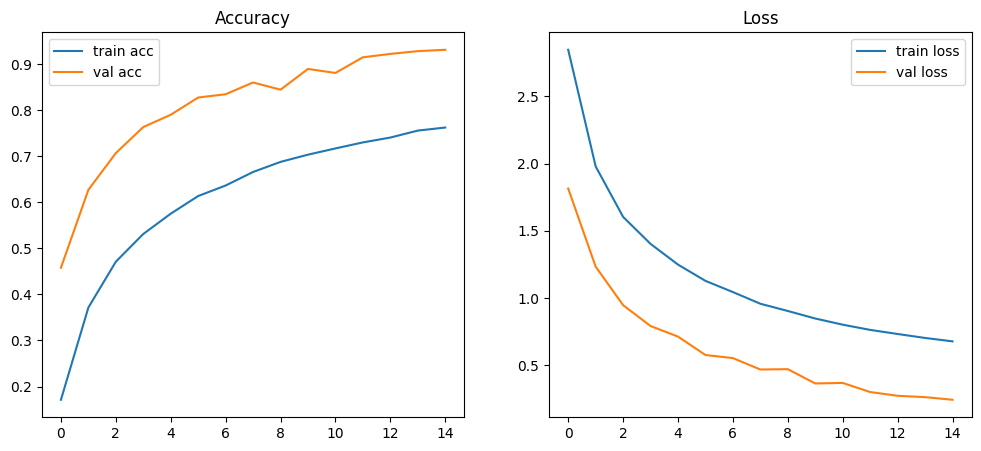

In [24]:
# plot akurasi & loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss")
plt.legend()
plt.show()


In [25]:
#evaluasi di test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=le.classes_))


136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           A       0.88      0.93      0.90       150
           B       0.94      0.99      0.97       150
           C       0.99      1.00      1.00       150
           D       1.00      0.97      0.98       150
           E       0.94      0.95      0.95       150
           F       0.97      0.98      0.98       150
           G       0.97      0.93      0.95       150
           H       0.95      0.97      0.96       150
           I       0.99      0.95      0.97       150
           J       0.93      0.99      0.96       150
           K       0.89      0.99      0.93       150
           L       0.98      1.00      0.99       150
           M       0.91      0.92      0.92       150
           N       0.94      0.95      0.95       150
           O       0.99      0.99      0.99       150
           P       0.89      0.99      0.94       150
           Q       1.00      0.88      0

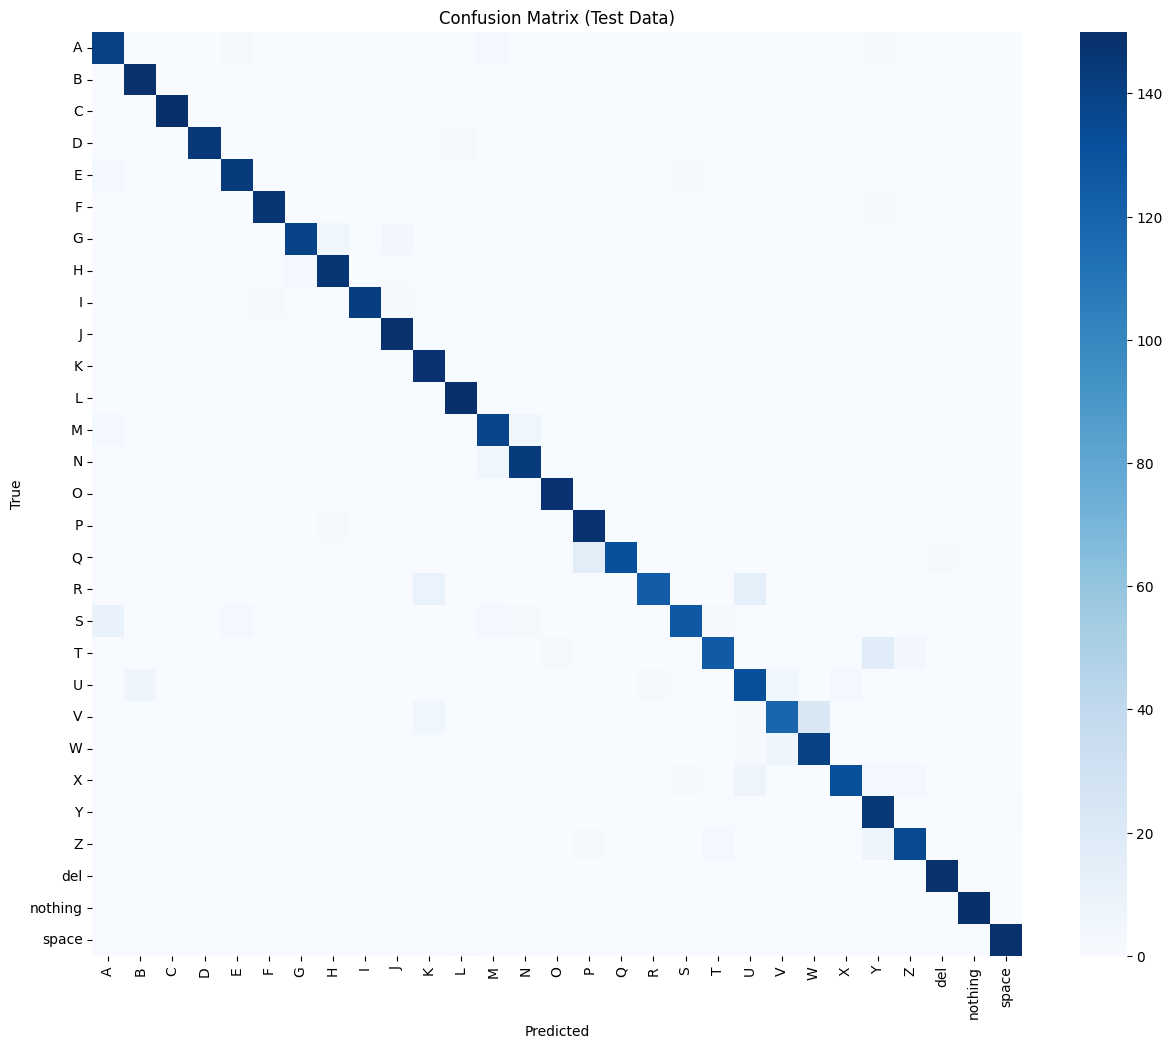

In [26]:
#confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(15,12))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


#simpan model baseline

In [27]:
model.save("/content/cnn_baseline_asl.h5")
print("Model baseline tersimpan!")

Model baseline tersimpan!


# Hybrid GA–PSO Optimization (CNN)

Tujuan :
1. Melakukan hyperparameter tuning untuk CNN menggunakan metode hybrid **Genetic Algorithm (GA) → Particle Swarm Optimization (PSO)**.
2. GA akan mengeksplorasi hyperparameter diskret:
   - jumlah filter conv
   - units dense
   - batch size
3. PSO akan menyesuaikan hyperparameter continuous:
   - learning rate
   - dropout rate
4. Model terbaik akan dilatih penuh dan dibandingkan dengan baseline.

Fitness function = **akurasi pada validation set**.


# setup library

In [28]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# dari Notebook 2
# X_train, y_train, X_val, y_val, le, num_classes

# fungsi build model

In [29]:
def build_cnn(filters1=32, filters2=64, dense_units=128, dropout_rate=0.5, lr=0.001):
    model = Sequential([
        Conv2D(filters1, (3,3), activation='relu', input_shape=(64,64,3)),
        MaxPooling2D(2,2),
        Conv2D(filters2, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# fitness function

In [30]:
def fitness(individual):
    filters1, filters2, dense_units, batch_size, lr, dropout_rate = individual
    try:
        model = build_cnn(filters1, filters2, dense_units, dropout_rate, lr)
        history = model.fit(
            X_train, y_train,
            batch_size=batch_size,
            epochs=3,   # small epochs for speed
            validation_data=(X_val, y_val),
            verbose=0
        )
        val_acc = history.history['val_accuracy'][-1]
        return val_acc
    except Exception as e:
        print("Error:", e)
        return 0

# GA

In [31]:
# search space
FILTERS1 = [32, 64]
FILTERS2 = [64, 128]
DENSE_UNITS = [64, 128, 256]
BATCH_SIZE = [32, 64]
LR = [0.0005, 0.001, 0.005]  # initial choices
DROPOUT = [0.3, 0.5]

POP_SIZE = 6
GENS = 3

def random_individual():
    return [
        random.choice(FILTERS1),
        random.choice(FILTERS2),
        random.choice(DENSE_UNITS),
        random.choice(BATCH_SIZE),
        random.choice(LR),
        random.choice(DROPOUT)
    ]

# GA main loop
population = [random_individual() for _ in range(POP_SIZE)]
for gen in range(GENS):
    print(f"\n=== Generation {gen+1} ===")
    scores = []
    for ind in population:
        acc = fitness(ind)
        scores.append((acc, ind))
        print(f"Ind {ind} => Acc {acc:.4f}")
    scores.sort(reverse=True, key=lambda x: x[0])
    population = [ind for _, ind in scores[:POP_SIZE//2]]  # elitism
    # crossover + mutation
    new_pop = []
    while len(new_pop) < POP_SIZE:
        p1, p2 = random.sample(population, 2)
        child = [
            random.choice([p1[i], p2[i]]) for i in range(len(p1))
        ]
        if random.random() < 0.2:  # mutation
            child[random.randint(0, len(child)-1)] = random_individual()[0]
        new_pop.append(child)
    population = new_pop

best_ga = scores[0][1]
print("Best GA individual:", best_ga)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



=== Generation 1 ===
Ind [32, 64, 256, 64, 0.005, 0.5] => Acc 0.8244
Ind [32, 128, 256, 32, 0.005, 0.3] => Acc 0.9531
Ind [32, 64, 256, 64, 0.005, 0.3] => Acc 0.0345
Ind [32, 128, 256, 64, 0.005, 0.5] => Acc 0.9274
Ind [64, 64, 64, 64, 0.005, 0.5] => Acc 0.0345
Ind [32, 64, 128, 64, 0.005, 0.3] => Acc 0.0345

=== Generation 2 ===
Ind [32, 64, 256, 64, 0.005, 0.5] => Acc 0.8899
Ind [32, 128, 256, 64, 0.005, 0.5] => Acc 0.8547
Ind [32, 32, 256, 64, 0.005, 0.5] => Acc 0.9425
Ind [32, 128, 256, 32, 0.005, 0.5] => Acc 0.0345
Ind [32, 128, 256, 32, 0.005, 0.5] => Acc 0.0345
Ind [32, 64, 256, 64, 0.005, 0.5] => Acc 0.9446

=== Generation 3 ===
Ind [32, 64, 256, 64, 0.005, 0.5] => Acc 0.8087
Ind [32, 64, 256, 64, 0.005, 0.5] => Acc 0.0345
Ind [32, 64, 256, 64, 0.005, 0.5] => Acc 0.0345
Ind [32, 32, 256, 64, 0.005, 0.5] => Acc 0.8701
Ind [32, 64, 256, 64, 0.005, 0.5] => Acc 0.0345
Ind [32, 64, 256, 64, 0.005, 0.5] => Acc 0.8697
Best GA individual: [32, 32, 256, 64, 0.005, 0.5]


#PSO

In [32]:
# refine lr & dropout
import math

def pso_optimize(base_ind, iterations=5, swarm_size=5):
    best_global = None
    best_score = -1
    particles = []
    for _ in range(swarm_size):
        lr = base_ind[4] * (0.5 + random.random())  # perturb
        dr = base_ind[5] + (random.random()-0.5)*0.2
        dr = min(max(dr,0.1),0.7)
        particles.append([lr, dr])

    for it in range(iterations):
        for p in particles:
            ind = base_ind.copy()
            ind[4], ind[5] = p
            acc = fitness(ind)
            if acc > best_score:
                best_score = acc
                best_global = ind.copy()
        # update
        for p in particles:
            p[0] = (p[0] + best_global[4]) / 2
            p[1] = (p[1] + best_global[5]) / 2
    return best_global, best_score

best_pso, best_score = pso_optimize(best_ga)
print("Best GA+PSO individual:", best_pso, "Acc:", best_score)


Best GA+PSO individual: [32, 32, 256, 64, 0.002931710537732132, 0.4290114803631723] Acc: 0.9616091847419739


#train final model

In [35]:
# extract hyperparameters from best_pso
filters1, filters2, dense_units, batch_size, lr, dropout_rate = best_pso

final_model = build_cnn(filters1, filters2, dense_units, dropout_rate, lr)
history = final_model.fit(
    X_train, y_train,
    batch_size=batch_size, # Use the extracted batch_size
    epochs=25,
    validation_data=(X_val, y_val)
)

final_model.save("/content/cnn_best_ga_pso.h5")
print("Final model saved!")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
544/544 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.2730 - loss: 2.5338 - val_accuracy: 0.7777 - val_loss: 0.6862
Epoch 2/25
544/544 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7422 - loss: 0.7756 - val_accuracy: 0.8894 - val_loss: 0.3426
Epoch 3/25
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8424 - loss: 0.4578 - val_accuracy: 0.9333 - val_loss: 0.2087
Epoch 4/25
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8828 - loss: 0.3369 - val_accuracy: 0.9540 - val_loss: 0.1590
Epoch 5/25
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9085 - loss: 0.2699 - val_accuracy: 0.9566 - val_loss: 0.1416
Epoch 6/25
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9188 - loss: 0.2371 - val_accuracy: 0.9630 - val_loss: 0.1205
Epoch 7/25
544/544 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9342 - loss: 0.2000 - val_accuracy: 0.9740 - val_loss: 0.0855
Epoch 8/25
544/544 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9450 - loss: 0.1608 - val_accuracy: 

Final model saved!


# evaluasi final model

In [ ]:
y_pred = final_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))


In [36]:
# Simpan model final
final_model.save("/content/cnn_best_ga_pso.h5")
print("✅ Final model tersimpan!")

# Simpan mapping label (A–Z)
np.save("/content/labels.npy", le.classes_)
print("✅ Labels tersimpan:", le.classes_)


✅ Final model tersimpan!
✅ Labels tersimpan: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'del' 'nothing' 'space']
